In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
bets = pd.read_parquet("manifold_datasets/bets.parquet")

In [3]:
first_bets = bets.groupby("userId").agg(firstBetTime=("createdTime", "min"))
first_bets["firstBetTime"] = pd.to_datetime(first_bets["firstBetTime"], unit="ms")


In [4]:
first_bets["daysSinceFirstBet"] = (pd.to_datetime("2024-07-06") - first_bets["firstBetTime"]).apply(lambda x: x.days)

In [ ]:
first_bets["daysSinceFirstBet"] = (pd.to_datetime("2024-07-06") - first_bets["firstBetTime"]).dt.days

userId
006ExGmFyEaGVJKFKuI6lCbKIXC3    230
009leLZY0lfxE1SWbxYQbl2BqH92    433
00AQgbGKIzSpfQJLmRsLLU5eJk62    226
00B6p8w0scS7bOOITtTzG5Rs0LY2    731
00IzMudzYJYVm6geKiuixM1PFci2    345
                               ... 
zzZt9l2QPteOJ8X1xfO7XFw6cOu2    598
zzmGvbKWhUbdygC5xGvz0y0kk1O2    493
zzmNhPCAnmfHmtzZPFRwIpnMsy93    339
zzrkrPp188eclYVliKGuCzC7QX52    286
zzwgLQOPLKazB5o6psIELmsiqe32    230
Name: firstBetTime, Length: 56139, dtype: int64

In [5]:
df = pd.read_parquet("manifold_datasets/churn.parquet")

In [6]:
df = df.merge(first_bets, on="userId", how="inner")

In [7]:
df.head()

,userId,lastBetTime,daysSinceLastBet,numContractsCreatedLast7Days,numContractsCreatedLast30Days,numCommentLikesLast7Days,numCommentLikesLast30Days,numCommentsLast7Days,numCommentsLast30Days,bettingDaysLast7Days,numBetsLast7Days,bettingDaysLast30Days,numBetsLast30Days,bettingDays,dailyStreak,firstBetTime,daysSinceFirstBet
0,006ExGmFyEaGVJKFKuI6lCbKIXC3,2023-12-20 02:45:55.669,-199,0,0,0,0,0,0,1,2,1,2,2,0.0,2023-11-18 02:03:43.736,230
1,009leLZY0lfxE1SWbxYQbl2BqH92,2023-09-16 09:20:23.555,-294,0,0,0,0,0,0,2,4,4,6,44,0.0,2023-04-29 13:43:16.184,433
2,00AQgbGKIzSpfQJLmRsLLU5eJk62,2023-11-22 05:53:25.946,-227,0,0,0,0,0,0,1,1,1,1,1,0.0,2023-11-22 05:53:25.946,226
3,00B6p8w0scS7bOOITtTzG5Rs0LY2,2022-07-05 05:37:22.249,-732,0,0,0,0,0,0,1,1,1,1,1,0.0,2022-07-05 05:37:22.249,731
4,00IzMudzYJYVm6geKiuixM1PFci2,2023-08-04 02:52:03.861,-337,0,0,0,0,0,0,1,2,2,5,2,0.0,2023-07-26 16:58:19.991,345


In [8]:
df["daysSinceLastBet"] = df["daysSinceLastBet"] * -1

<Axes: xlabel='daysSinceFirstBet', ylabel='Count'>

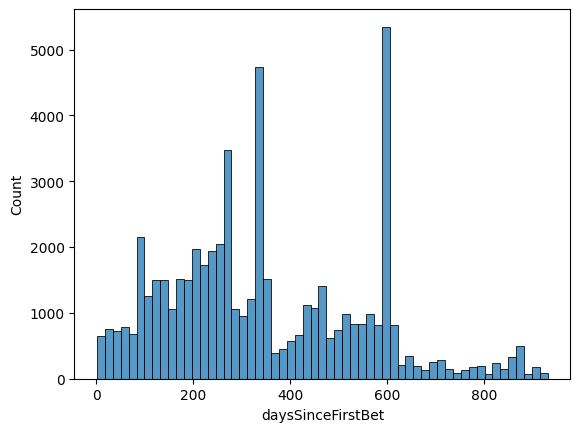

In [9]:
sns.histplot(df["daysSinceFirstBet"])

In [10]:
df.describe()

,lastBetTime,daysSinceLastBet,numContractsCreatedLast7Days,numContractsCreatedLast30Days,numCommentLikesLast7Days,numCommentLikesLast30Days,numCommentsLast7Days,numCommentsLast30Days,bettingDaysLast7Days,numBetsLast7Days,bettingDaysLast30Days,numBetsLast30Days,bettingDays,dailyStreak,firstBetTime,daysSinceFirstBet
count,56139,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139.000000,56139,56139.000000
mean,2023-10-17 16:23:54.333516288,262.854932,0.117975,0.220684,0.100946,0.185753,0.350309,0.794314,1.588183,8.307148,2.936533,17.995867,15.458719,0.178236,2023-07-23 09:35:55.281778176,348.129696
min,2021-12-27 21:14:12.114000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2021-12-17 22:12:21.260000,1.000000
25%,2023-06-21 01:12:01.342000128,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2023-02-10 02:53:21.517000192,196.000000
50%,2023-11-17 23:44:15.134000128,232.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2023-08-17 12:37:19.080000,323.000000
75%,2024-03-27 07:55:09.660499968,381.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,2.000000,9.000000,6.000000,0.000000,2023-12-22 15:34:11.902500096,511.000000
max,2024-07-04 22:15:24.157000,922.000000,543.000000,543.000000,265.000000,286.000000,2003.000000,2091.000000,8.000000,9193.000000,31.000000,24378.000000,894.000000,492.000000,2024-07-04 22:06:20.504000,931.000000
std,NaN,195.757717,3.162012,3.786843,2.182551,3.182036,8.956558,12.256220,1.337078,56.699352,4.955872,162.210549,51.337125,3.630048,NaN,203.005045


In [28]:
rd = df[
    ((df["daysSinceFirstBet"] > 30) & (df["daysSinceLastBet"] < 30))
    | (df["daysSinceLastBet"] > 30) & (df["daysSinceLastBet"] < 120)
]
rd = rd.assign(
    inactive=(rd["daysSinceLastBet"] > 30).astype(np.int8),
    Streak7DayPlus=(rd["dailyStreak"] > 7).astype(np.int8),
)

In [29]:
def filt_upper_outlier(orig, reduced, column):
    orig_thresh = orig[column].mean() + 3 * orig[column].std()
    reduced_thresh = reduced[column].mean() + 3 * reduced[column].std()
    print(f"Column: {column}")
    print("orig thresh:", orig_thresh,  "num filtered:", (reduced[column] > orig_thresh).sum())
    print("reduced thresh:", reduced_thresh, "num filtered:", (reduced[column] > reduced_thresh).sum())
    print()
    return reduced[column] < orig_thresh


fd = rd[
    filt_upper_outlier(orig=df, reduced=rd, column="numBetsLast7Days")
    & filt_upper_outlier(orig=df, reduced=rd, column="numBetsLast30Days")
    & filt_upper_outlier(orig=df, reduced=rd, column="numContractsCreatedLast7Days")
    & filt_upper_outlier(orig=df, reduced=rd, column="numContractsCreatedLast30Days")
    & filt_upper_outlier(orig=df, reduced=rd, column="numCommentsLast7Days")
    & filt_upper_outlier(orig=df, reduced=rd, column="numCommentsLast30Days")
]

Column: numBetsLast7Days
orig thresh: 178.40520489267197 num filtered: 111
reduced thresh: 298.0447516443746 num filtered: 60

Column: numBetsLast30Days
orig thresh: 504.62751493942363 num filtered: 125
reduced thresh: 886.3487963548826 num filtered: 58

Column: numContractsCreatedLast7Days
orig thresh: 9.604010768712737 num filtered: 15
reduced thresh: 4.136960402873207 num filtered: 38

Column: numContractsCreatedLast30Days
orig thresh: 11.581212820283834 num filtered: 44
reduced thresh: 9.843286533726198 num filtered: 58

Column: numCommentsLast7Days
orig thresh: 27.21998402094886 num filtered: 56
reduced thresh: 15.262249765888283 num filtered: 101

Column: numCommentsLast30Days
orig thresh: 37.56297472002815 num filtered: 129
reduced thresh: 47.90775891804538 num filtered: 91



In [30]:
fd.describe()

,lastBetTime,daysSinceLastBet,numContractsCreatedLast7Days,numContractsCreatedLast30Days,numCommentLikesLast7Days,numCommentLikesLast30Days,numCommentsLast7Days,numCommentsLast30Days,bettingDaysLast7Days,numBetsLast7Days,bettingDaysLast30Days,numBetsLast30Days,bettingDays,dailyStreak,firstBetTime,daysSinceFirstBet,inactive,Streak7DayPlus
count,14297,14297.000000,14297.000000,14297.000000,14297.0,14297.0,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000,14297,14297.000000,14297.000000,14297.000000
mean,2024-05-14 06:51:34.440310528,53.254039,0.059313,0.149332,0.0,0.0,0.260334,0.699517,1.920543,8.255508,4.438623,19.981884,39.030286,0.218787,2023-11-05 10:00:54.314740224,243.100091,0.657690,0.005875
min,2024-03-09 00:24:39.764000,2.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2021-12-17 22:12:21.260000,30.000000,0.000000,0.000000
25%,2024-04-12 00:47:19.492000,12.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2023-08-03 16:26:21.863000064,86.000000,0.000000,0.000000
50%,2024-05-13 16:32:43.508999936,54.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,3.000000,2.000000,5.000000,6.000000,0.000000,2024-01-18 17:34:59.454000128,169.000000,1.000000,0.000000
75%,2024-06-24 15:13:06.759000064,85.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.000000,8.000000,4.000000,15.000000,30.000000,0.000000,2024-04-10 09:22:14.068000,337.000000,1.000000,0.000000
max,2024-07-04 22:15:24.157000,119.000000,8.000000,11.000000,0.0,0.0,26.000000,37.000000,8.000000,177.000000,31.000000,502.000000,894.000000,63.000000,2024-06-05 21:47:43.392000,931.000000,1.000000,1.000000
std,NaN,37.944804,0.355005,0.708795,0.0,0.0,1.262404,2.950121,1.724477,15.836235,6.912356,45.777926,84.330904,1.590306,NaN,206.254838,0.474499,0.076428


In [31]:
rd["inactive"].value_counts()

inactive
1    9467
0    5076
Name: count, dtype: int64

In [32]:
fd["inactive"].value_counts()

inactive
1    9403
0    4894
Name: count, dtype: int64

In [65]:
import matplotlib.pyplot as plt

In [73]:
list(fd["daysSinceLastBet"].value_counts().sort_index())

[1287,
 606,
 305,
 291,
 169,
 169,
 383,
 106,
 75,
 101,
 120,
 46,
 72,
 76,
 68,
 64,
 87,
 126,
 42,
 63,
 69,
 54,
 80,
 89,
 124,
 62,
 70,
 90,
 92,
 101,
 115,
 63,
 78,
 117,
 102,
 79,
 113,
 103,
 66,
 73,
 97,
 102,
 105,
 97,
 96,
 73,
 97,
 146,
 76,
 113,
 111,
 98,
 111,
 69,
 86,
 67,
 62,
 70,
 79,
 61,
 57,
 124,
 72,
 125,
 107,
 92,
 62,
 64,
 140,
 113,
 135,
 121,
 103,
 89,
 99,
 89,
 94,
 129,
 154,
 160,
 143,
 214,
 451,
 461,
 140,
 73,
 79,
 81,
 64,
 72,
 76,
 79,
 111,
 122,
 58,
 96,
 105,
 70,
 92,
 99,
 108,
 89,
 93,
 98,
 83,
 83,
 113,
 97,
 95,
 73,
 126,
 97,
 114,
 99,
 111,
 104,
 87]

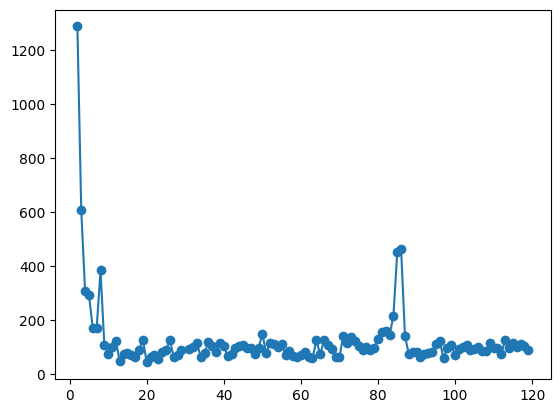

In [71]:
plt.plot(fd["daysSinceLastBet"].value_counts().sort_index(), marker="o")

<Axes: xlabel='numBetsLast7Days', ylabel='numBetsLast30Days'>

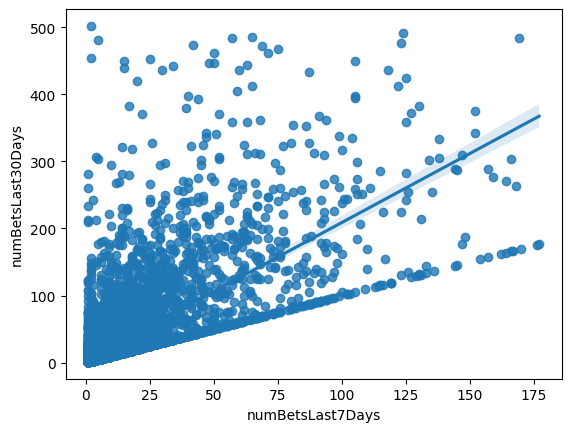

In [126]:
sns.regplot(x="numBetsLast7Days", y="numBetsLast30Days", data=fd)

<Axes: xlabel='inactive', ylabel='daysSinceLastBet'>

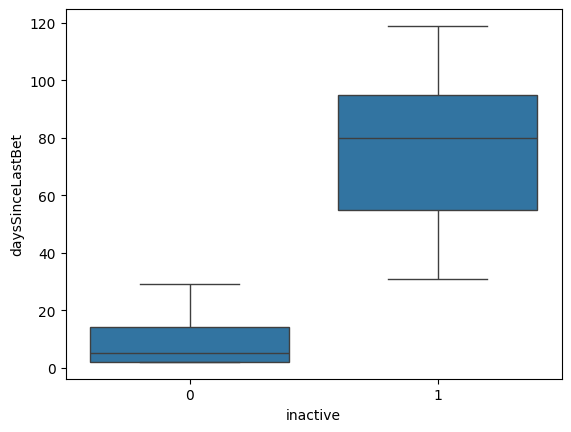

In [33]:
sns.boxplot(x="inactive", y="daysSinceLastBet", data=fd)

<Axes: xlabel='dailyStreak', ylabel='Count'>

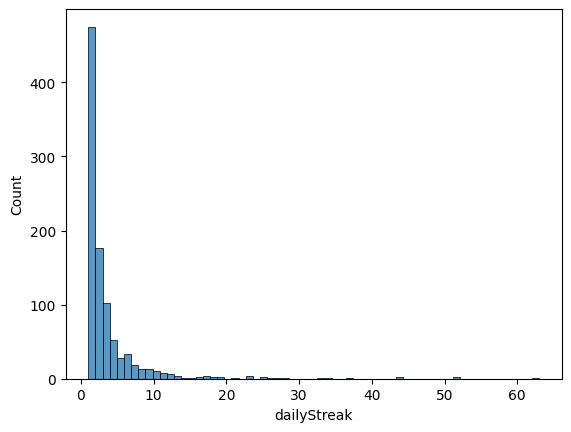

In [34]:
sns.histplot(fd[fd["dailyStreak"] > 0]["dailyStreak"])

<Axes: xlabel='numBetsLast7Days', ylabel='Count'>

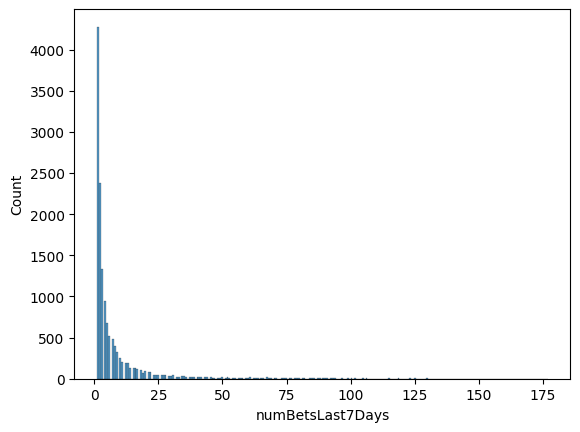

In [35]:
sns.histplot(fd["numBetsLast7Days"])

<Axes: xlabel='numBetsLast30Days', ylabel='Count'>

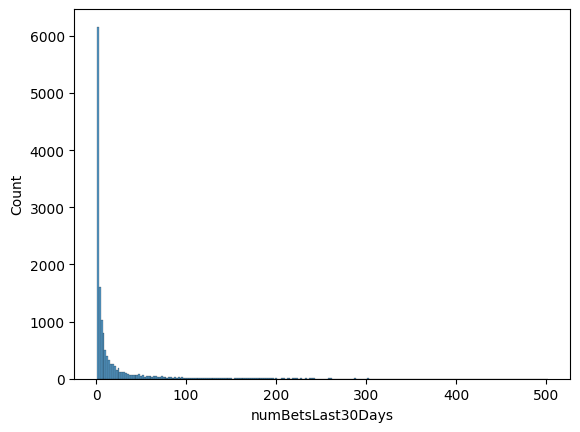

In [36]:
sns.histplot(fd["numBetsLast30Days"])

In [37]:
fd["numCommentLikesLast7Days"].value_counts()

numCommentLikesLast7Days
0    14297
Name: count, dtype: int64

In [38]:
fd["numCommentLikesLast30Days"].value_counts()

numCommentLikesLast30Days
0    14297
Name: count, dtype: int64

In [39]:
fd["numCommentsLast7Days"].value_counts()

numCommentsLast7Days
0     12934
1       696
2       259
3       125
4        67
5        50
6        33
7        29
8        24
9        16
10       15
11       14
15        5
12        5
13        5
14        4
17        3
19        2
16        2
22        2
20        2
25        1
21        1
18        1
26        1
23        1
Name: count, dtype: int64

In [40]:
fd["numCommentsLast30Days"].value_counts()

numCommentsLast30Days
0     12185
1       836
2       345
3       192
4       124
5        97
6        73
7        65
8        50
9        40
11       29
10       26
12       23
14       21
15       18
13       18
20       16
16       15
19       14
18       13
21       11
22       10
24       10
17       10
23        8
36        7
26        7
34        4
25        4
35        4
29        4
37        4
30        3
32        3
33        3
31        3
27        1
28        1
Name: count, dtype: int64

In [ ]:
sns.pairplot(fd, vars=[])

In [41]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [82]:
logit_fit = smf.logit("inactive ~ bettingDaysLast30Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.569158
         Iterations 6


In [83]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14295
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.1142
Time:                        10:11:43   Log-Likelihood:                -8137.2
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.2410      0.023     52.941      0.000       1.195       1.287
bettingDaysLast30Days    -0.1341      0.004    -36.069      0.000      -0.141      -0.127
=========================================================================================
"""

In [76]:
logit_fit = smf.logit("inactive ~ numBetsLast7Days + numBetsLast30Days + numCommentsLast30Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.600488
         Iterations 6


In [77]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14293
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                 0.06547
Time:                        10:09:45   Log-Likelihood:                -8585.2
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                1.732e-260
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9006      0.021     42.323      0.000       0.859       0.942
numBetsLast7Days          0.0223      0.002     11.081      0.000       0.018       0.026
numBetsLast30Days        -0.0201      0.001    -20.123      0.000      -0.022      -0.018
numCommentsLast30Days    -0.0829      0.010     -8.358      0.000      -0.102      -0.063
=========================================================================================
"""

In [58]:
logit_fit = smf.logit("inactive ~ bettingDaysLast7Days + bettingDaysLast30Days + numCommentsLast30Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.567924
         Iterations 6


In [59]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14293
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.1161
Time:                        09:54:45   Log-Likelihood:                -8119.6
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3339      0.031     42.652      0.000       1.273       1.395
bettingDaysLast7Days     -0.0976      0.021     -4.652      0.000      -0.139      -0.056
bettingDaysLast30Days    -0.1076      0.006    -18.005      0.000      -0.119      -0.096
numCommentsLast30Days    -0.0319      0.009     -3.414      0.001      -0.050      -0.014
=========================================================================================
"""

In [52]:
logit_fit = smf.logit("inactive ~ bettingDaysLast7Days + numContractsCreatedLast7Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.582196
         Iterations 5


In [53]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14294
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                 0.09394
Time:                        09:51:59   Log-Likelihood:                -8323.7
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.5281      0.030     51.749      0.000       1.470       1.586
bettingDaysLast7Days            -0.4489      0.012    -36.630      0.000      -0.473      -0.425
numContractsCreatedLast7Days     0.1573      0.055      2.837      0.005       0.049       0.266
================================================================================================
"""

In [54]:
logit_fit = smf.logit("inactive ~ bettingDaysLast30Days + numContractsCreatedLast30Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.568978
         Iterations 6


In [55]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14294
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.1145
Time:                        09:52:26   Log-Likelihood:                -8134.7
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.2404      0.023     52.905      0.000       1.194       1.286
bettingDaysLast30Days            -0.1365      0.004    -35.118      0.000      -0.144      -0.129
numContractsCreatedLast30Days     0.0692      0.030      2.279      0.023       0.010       0.129
=================================================================================================
"""

In [56]:
logit_fit = smf.logit("inactive ~ bettingDaysLast30Days + numContractsCreatedLast30Days + Streak7DayPlus", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.568942
         Iterations 7


In [57]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14293
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.1146
Time:                        09:53:49   Log-Likelihood:                -8134.2
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.2385      0.024     52.666      0.000       1.192       1.285
bettingDaysLast30Days            -0.1357      0.004    -34.371      0.000      -0.143      -0.128
numContractsCreatedLast30Days     0.0697      0.030      2.288      0.022       0.010       0.129
Streak7DayPlus                   -0.4962      0.527     -0.942      0.346      -1.528       0.536
=================================================================================================
"""

In [74]:
logit_fit = smf.logit("inactive ~ bettingDaysLast30Days + numContractsCreatedLast7Days + numCommentsLast30Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.568510
         Iterations 6


In [75]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14293
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.1152
Time:                        10:07:46   Log-Likelihood:                -8128.0
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.2341      0.024     52.440      0.000       1.188       1.280
bettingDaysLast30Days           -0.1286      0.004    -32.513      0.000      -0.136      -0.121
numContractsCreatedLast7Days     0.1300      0.060      2.148      0.032       0.011       0.249
numCommentsLast30Days           -0.0390      0.010     -3.975      0.000      -0.058      -0.020
================================================================================================
"""

In [48]:
logit_fit = smf.logit("inactive ~ bettingDaysLast7Days + bettingDaysLast30Days + numContractsCreatedLast7Days + numContractsCreatedLast30Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.568146
         Iterations 6


In [49]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14292
Method:                           MLE   Df Model:                            4
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.1158
Time:                        09:33:12   Log-Likelihood:                -8122.8
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.3402      0.031     42.868      0.000       1.279       1.401
bettingDaysLast7Days             -0.1031      0.021     -4.865      0.000      -0.145      -0.062
bettingDaysLast30Days            -0.1139      0.006    -18.881      0.000      -0.126      -0.102
numContractsCreatedLast7Days      0.0209      0.076      0.273      0.785      -0.129       0.171
numContractsCreatedLast30Days     0.0674      0.041      1.655      0.098      -0.012       0.147
=================================================================================================
"""

In [50]:
logit_fit = smf.logit("inactive ~  numContractsCreatedLast7Days + numContractsCreatedLast30Days", data=fd).fit()

Optimization terminated successfully.
         Current function value: 0.637232
         Iterations 5


In [51]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14294
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                0.008285
Time:                        09:39:31   Log-Likelihood:                -9110.5
converged:                       True   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                 8.788e-34
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.6949      0.018     38.242      0.000       0.659       0.731
numContractsCreatedLast7Days      0.3773      0.072      5.237      0.000       0.236       0.518
numContractsCreatedLast30Days    -0.4269      0.041    -10.337      0.000      -0.508      -0.346
=================================================================================================
"""

In [43]:
log_reg = smf.logit("inactive ~ daysSinceLastBet", data=fd).fit()

         Current function value: 0.000000
         Iterations: 35


/home/sean/Documents/statistics_for_datascience/manifold_analysis/.venv/lib64/python3.13/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/sean/Documents/statistics_for_datascience/manifold_analysis/.venv/lib64/python3.13/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/sean/Documents/statistics_for_datascience/manifold_analysis/.venv/lib64/python3.13/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/sean/Documents/statistics_for_datascience/manifold_analysis/.venv/lib64/python3.13

In [45]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               inactive   No. Observations:                14297
Model:                          Logit   Df Residuals:                    14295
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                   1.000
Time:                        09:28:47   Log-Likelihood:            -1.3370e-06
converged:                      False   LL-Null:                       -9186.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -561.8440   2.59e+04     -0.022      0.983   -5.14e+04    5.03e+04
daysSinceLastBet    18.7296    865.329      0.022      0.983   -1677.284    1714.743
====================================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [89]:
ols_fit = smf.ols("daysSinceLastBet ~ bettingDaysLast30Days + numContractsCreatedLast30Days + numBetsLast30Days", data=fd).fit()

In [90]:
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       daysSinceLastBet   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     742.0
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:14:57   Log-Likelihood:                -71237.
No. Observations:               14297   AIC:                         1.425e+05
Df Residuals:                   14293   BIC:                         1.425e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        62.1877      0.351    177.050      0.000      61.499      62.876
bettingDaysLast30Days            -2.2524      0.063    -35.877      0.000      -2.375      -2.129
numContractsCreatedLast30Days     0.8419      0.438      1.922      0.055      -0.017       1.701
numBetsLast30Days                 0.0469      0.009      4.949      0.000       0.028       0.066
==============================================================================
Omnibus:                     3228.580   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.284
Skew:                           0.065   Prob(JB):                    1.64e-131
Kurtosis:                       2.003   Cond. No.                         74.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    fd[["bettingDaysLast30Days", "numBetsLast30Days", "bettingDaysLast7Days", "numBetsLast7Days", "numContractsCreatedLast30Days", "numCommentsLast30Days", "numCommentsLast7Days", "Streak7DayPlus"]],
    fd["daysSinceLastBet"],
    test_size=0.2,
    random_state=42
)

In [102]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [103]:
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRandom Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


Random Forest Model Performance:
RMSE: 35.73
R²: 0.1100


In [104]:
from xgboost import XGBRegressor

In [105]:
model = XGBRegressor()

In [106]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [108]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nXGBoost Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


XGBoost Performance:
RMSE: 35.39
R²: 0.1267


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    # fd[["bettingDaysLast30Days", "numBetsLast30Days", "bettingDaysLast7Days", "numBetsLast7Days", "numContractsCreatedLast30Days", "numCommentsLast30Days", "numCommentsLast7Days", "Streak7DayPlus"]],
    fd[["bettingDaysLast30Days", "bettingDaysLast7Days", "numContractsCreatedLast30Days", "numCommentsLast30Days"]],
    fd["inactive"],
    test_size=0.2,
    random_state=42
)

In [113]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [114]:
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRandom Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


Random Forest Model Performance:
RMSE: 0.52
R²: -0.2079


In [119]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49       985
           1       0.74      0.91      0.81      1875

    accuracy                           0.73      2860
   macro avg       0.71      0.64      0.65      2860
weighted avg       0.72      0.73      0.70      2860



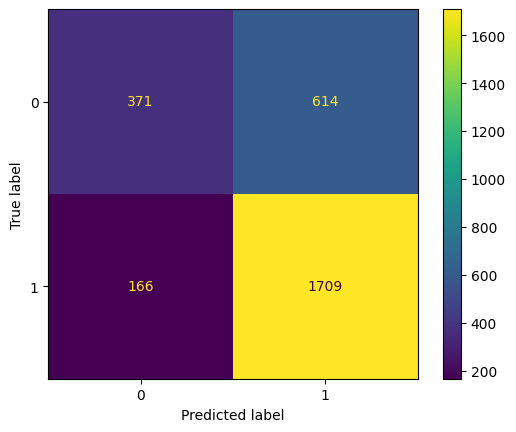

In [121]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()